In [3]:
import numpy as np
import qiskit
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import matplotlib as mpl

In [5]:
n = 100
pi = np.pi
radius = np.sqrt(2 / pi)
X = 1.9 * np.random.rand(n, 2) - 1
Y = np.empty(n)
for i,x in enumerate(X):
    if x[0] > 0 and x[1] > 0: Y[i] = 0
    elif x[0] > 0 and x[1] < 0: Y[i] = 1
    elif x[0] < 0 and x[1] > 0: Y[i] = 2
    else: Y[i] = 3

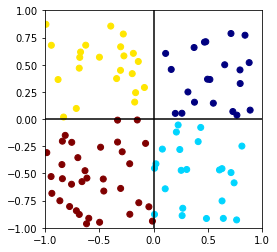

In [6]:
cmap = cm.get_cmap('jet')
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap)
ax.plot([0,0], [-1,1], color='black')
ax.plot([-1,1], [0,0], color='black')
ax.set(xlim=[-1,1], ylim=[-1,1])
ax.set_aspect('equal', 'box')
plt.show()

In [1]:
def measurement_4classes_2qubit(x, y, parameters, device):
    if len(parameters) % 10 != 0:
        raise ValueError('The number of parameters is not correct')
        layers = len(parameters) // 5 // 2
        qubits = 2
        parameters = parameters.reshape(qubits, layers, 5)
        C = QuantumCircuit(5,1)
        theta = 2 * np.arccos(1/np.sqrt(3))
        if y == 1:
            C.x(2)
        elif y == 2:
            C.x(3)
        elif y == 3:
            C.x(2)
            C.x(3)
    
        C.h(4)
        for l in range(layers - 1):
            for q in range(qubits):
                C.u3(parameters[q,l,0] * x[0] + parameters[q,l, 1],
                     parameters[q,l, 2] * x[1] + parameters[q,l, 3],
                     parameters[q,l, 2], q)
            C.cx(0,1)
        for q in range(qubits):
            C.u3(parameters[q,-1,0] * x[0] + parameters[q,-1, 1],
                     parameters[q,-1, 2] * x[1] + parameters[q,-1, 3],
                     parameters[q,-1, 2], q)
            
        C.cswap(4, 0, 2)
        C.cswap(4, 1, 3)
        C.h(4)
            
        C.measure([2], [0])
        C.draw()
        # Select the QasmSimulator from the Aer provider,
        simulator = Aer.get_backend(device)
    
        # Execute and get counts,
        sh = 1024
        result = execute(C, simulator, shots=sh).result()
        counts = result.get_counts(C)
        fidelity = 2 * counts['0'] / sh - 1
        return fidelity

In [2]:
def cost_function_4classes_2qubit(parameters, X, Y, device):
        chi2 = 0
        for x, y in zip(X, Y):
            chi2 += (1 - measurement_4classes_2qubit(x, y, parameters, device))**2
            
        return chi2 / len(Y)

In [ ]:
layers=2
from scipy.optimize import minimize
parameters = np.random.rand(5*layers)

solution = minimize(cost_function_4classes_1qubit,parameters, args=(X, Y, dev), method='Powell')

solution